# FLIGHT FARE PREDICTION

## Business Case : To predict future flight prices and plan the journey accordingly.

# PROJECT SUMMARY

The Flight Fare Prediction project aims to address the unpredictability of airline ticket pricing by developing a machine learning model that accurately forecasts flight prices based on various travel parameters. The goal is to assist both customers in planning cost-effective journeys and airlines in setting dynamic yet reasonable fares.

# objective of the project

ceate a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

df = pd.read_excel("C:\\Users\\abc\\Flight_Fare.xlsx")






# Domain Analysis

**Airline:** This column contains the types of airlines, e.g., Indigo, Jet Airways, Air India, and others.

**Date_of_Journey:** This column represents the date on which the passenger’s journey will start.

**Source:** The place from where the passenger’s journey begins.

**Destination:** The place where the passenger wants to travel.

**Route:** Shows the route chosen by the passenger from source to destination.

**Arrival_Time:** The time when the passenger will reach the destination.

**Duration:** Total time taken by the flight from source to destination.

**Total_Stops:** Number of stops the flight will make during the journey.

**Additional_Info:** Contains additional information such as food availability, type of food, and other amenities.

**Price:** The total price of the flight for the complete journey, including all expenses before boarding.


In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# basic check

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [10]:
df.shape

(10683, 11)

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

 from describe we can see that date_of_journey is a  object data type,

therefore we have to convert the  datatype into timestamp so as the use this column properly for prediction

In [13]:
df['journey_day']=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day  # Extract day of journey from Date_of_Journey column

In [14]:
df['journey_month']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month # Extract month of journey from Date_of_Journey column

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
df.drop(['Date_of_Journey'],axis=1,inplace=True) # Drop the original Date_of_Journey column

In [17]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time'],format='%H:%M').dt.hour # Extract hour of departure from Dep_Time column

In [18]:
df['Dep_min']=pd.to_datetime(df['Dep_Time'],format='%H:%M').dt.minute # Extract minute of departure from Dep_Time column

In [19]:
df.drop(['Dep_Time'],axis=1,inplace=True) # Drop the original Dep_Time column

In [20]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [21]:
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour # Extract hour of arrival from Arrival_Time column
	  	

In [22]:
df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute # Extract minute of arrival from Arrival_Time column
	  	

In [23]:
df.drop(['Arrival_Time'],axis=1, inplace=True) # Drop the original Arrival_Time column

In [24]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [25]:
duration_hour = []
duration_min = []

for dur in df['Duration']:
    h = m = 0

    if 'h' in dur:
        h = int(dur.split('h')[0])

    if 'm' in dur:
        m = int(dur.split('m')[0].split()[-1])

    duration_hour.append(h)
    duration_min.append(m)




In [26]:
df['Duration_hours']=duration_hour
df['Duration_mins']=duration_min

In [27]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [28]:
df.drop('Duration', axis=1, inplace=True)


In [29]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# handling categorical data

## one can find many ways to handle categorical data some of them categorical data are

 ##1 Nominal data- data are not in any order OneHotEncoder is used in this case
 ##2 Ordinal data-data are in order LabelEncoder is used in this case

In [30]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

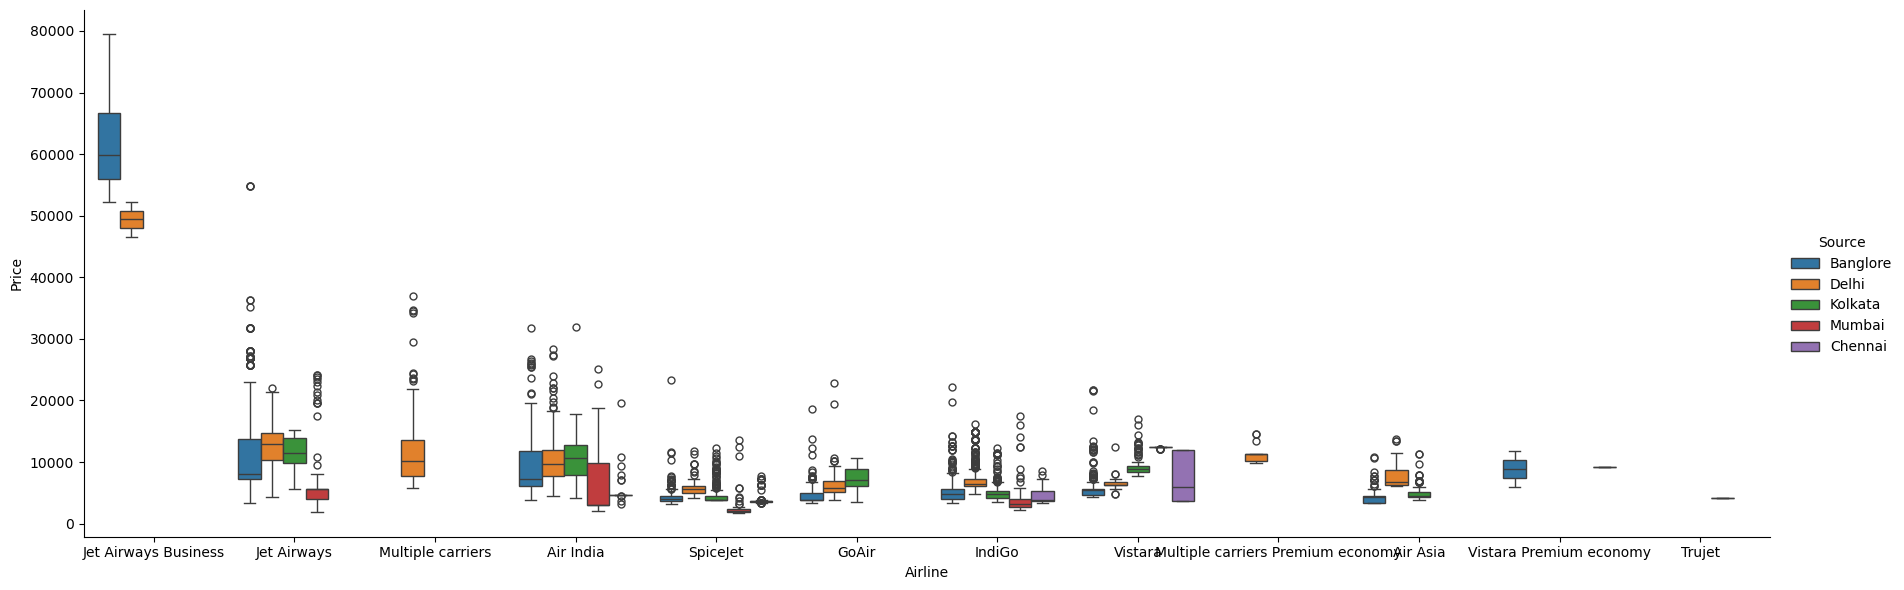

In [31]:
# from graph we can see that jet airways business have the highest price.
#apart from the first airline almost all are having similar midian


# airline vs price

sns.catplot(x='Airline', y='Price', hue='Source', data=df.sort_values('Price',ascending=False), kind='box', height=6, aspect=3)

plt.show()








In [32]:
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline=Airline.astype(int)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [33]:
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

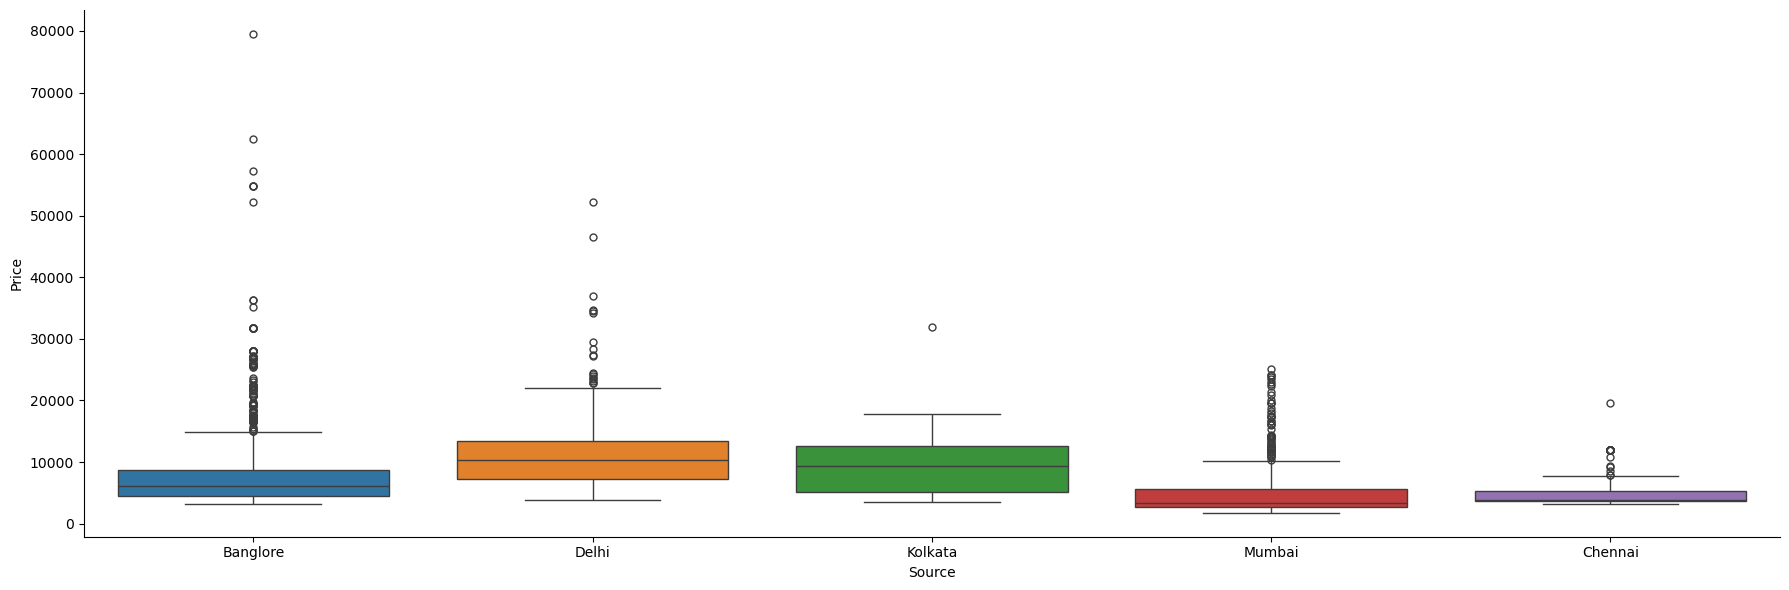

In [34]:
# source vs price

sns.catplot(x='Source', y='Price', hue='Source', data=df.sort_values('Price',ascending=False), kind='box', height=6, aspect=3)

plt.show()



In [35]:
# as source is nominal categorical data will perform onehotencoding


source = df[['Source']]
source = pd.get_dummies(source, drop_first=True)
source=source.astype(int)  
source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
df['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [37]:
destenation=df[['Destination']]
destenation=pd.get_dummies( destenation,drop_first=True)
destenation=destenation.astype(int)
                        
destenation.head()


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [39]:
# additional_info contains almost 80% no_info
# route and total_stops are related to each other


df.drop(['Route','Additional_Info'],axis= 1, inplace=True)

In [40]:
df

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [41]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [42]:
# as this is case of ordinal categorical type we perform label eUnicodeWarning
# here values are assigned with corresponding keys

df.replace({"non-stop ":0,'1 stop': 1,'2 stops':2,'3 stops ':3,'4 stops':4},inplace=True)

In [43]:
df

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [44]:
df.drop(['Airline', 'Source', 'Destination', 'Total_Stops'], axis=1, inplace=True)


In [45]:
# concatenate dataframe -->df + AAirline,Source,Destination
import pandas as pd

df= pd.concat([df,	Airline,source,	], axis = 1)

In [46]:
df

,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10679,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10680,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10681,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [47]:
df.shape

(10682, 24)

# target price

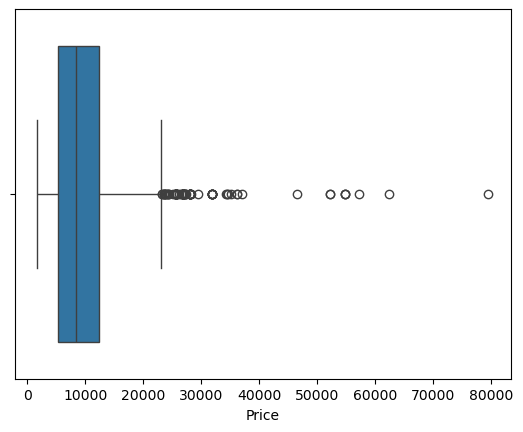

In [48]:
# check outliers

import seaborn as sns
sns.boxplot(x=df['Price'])
plt.show()


In [49]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
IQR = q3 - q1

lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 *IQR

df = df[(df['Price']>= lower_limit)&(df['Price']<=upper_limit)]


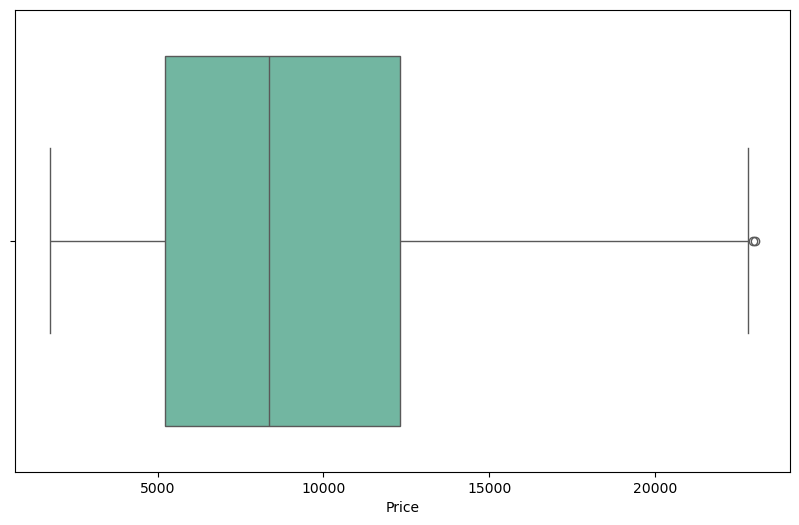

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Price'], palette='Set2')
plt.show()


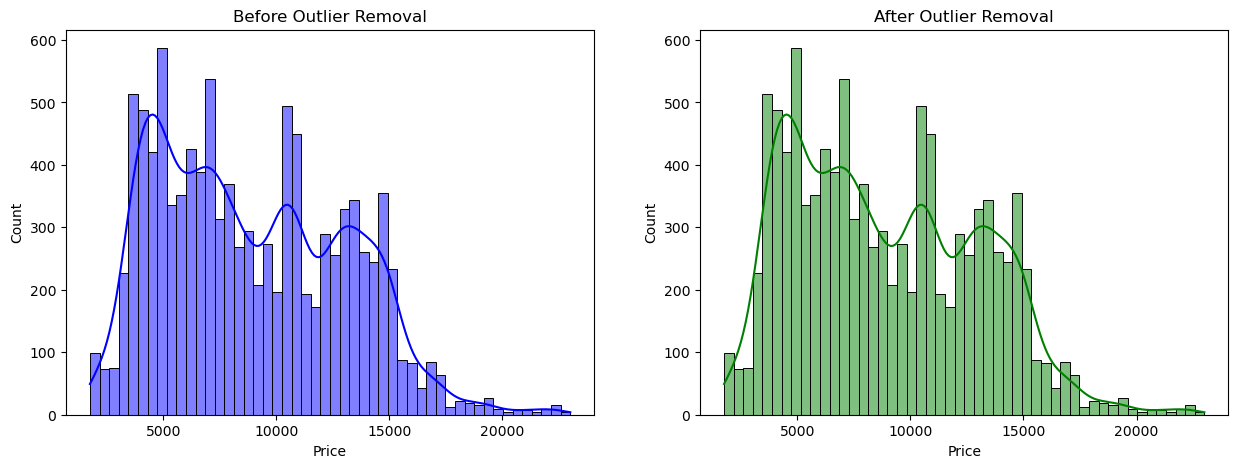

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Before
sns.histplot(df['Price'], bins=50, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Before Outlier Removal")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Count")

# After
sns.histplot(df['Price'], bins=50, kde=True, color='green', ax=axes[1])
axes[1].set_title("After Outlier Removal")
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Count")

plt.show()


In [52]:
df.head()

,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:

num_cols = ['Duration_hours', 'Duration_mins', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min']

df

,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10679,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10680,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10681,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## feature scaling

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['Duration_hours','Duration_mins','Dep_hour','Dep_min','Arrival_hour','Arrival_min']

# Fit and transform the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])


In [55]:
df.columns

Index(['Price', 'journey_day', 'journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [56]:
print(df[num_cols].head())

   Duration_hours  Duration_mins  Dep_hour   Dep_min  Arrival_hour  \
0       -0.967333       1.277334  1.655351 -0.231022     -1.802873   
1       -0.379314      -0.196395 -1.304002  1.370850     -0.052301   
2        1.031933      -1.670124 -0.607684  0.035957     -1.365230   
3       -0.614522      -0.196395  0.959033 -1.031958      1.406508   
4       -0.732125       0.982588  0.610873  1.370850      1.114747   

   Arrival_min  
0    -0.888743  
1    -0.586297  
2     0.018596  
3     0.321042  
4     0.623489  


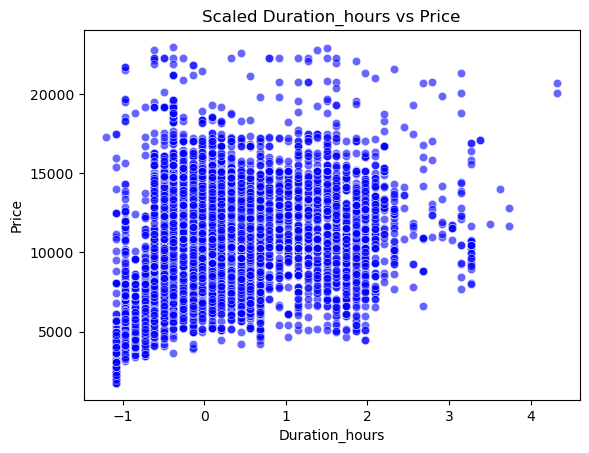

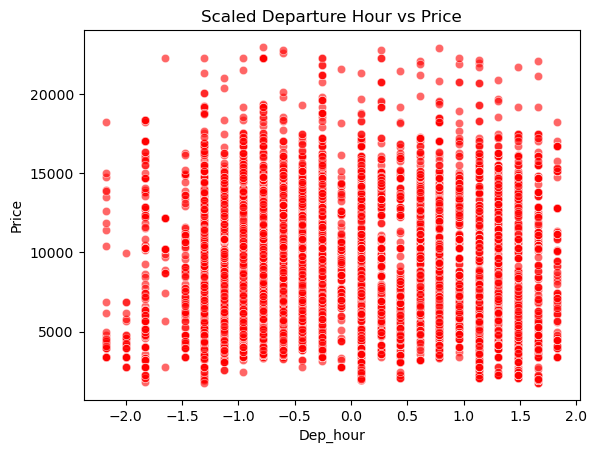

In [57]:
sns.scatterplot(x='Duration_hours', y='Price',color='blue', data=df,alpha=0.6)
plt.title("Scaled Duration_hours vs Price")
plt.show()

sns.scatterplot(x='Dep_hour', y='Price',color='red',data=df,alpha=0.6) 
            
plt.title("Scaled Departure Hour vs Price")
plt.show()


In [58]:
df

,Price,journey_day,journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,3897,24,3,1.655351,-0.231022,-1.802873,-0.888743,-0.967333,1.277334,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,7662,1,5,-1.304002,1.370850,-0.052301,-0.586297,-0.379314,-0.196395,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,13882,9,6,-0.607684,0.035957,-1.365230,0.018596,1.031933,-1.670124,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,6218,12,5,0.959033,-1.031958,1.406508,0.321042,-0.614522,-0.196395,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,13302,1,3,0.610873,1.370850,1.114747,0.623489,-0.732125,0.982588,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,1.133112,1.637829,1.260628,0.018596,-0.967333,0.098351,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10679,4145,27,4,1.307192,1.103872,1.406508,-0.283851,-0.967333,0.393097,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10680,7229,27,4,-0.781763,-0.231022,-0.344063,-0.283851,-0.849729,-1.670124,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10681,12648,1,3,-0.259525,0.302936,0.093580,-0.888743,-0.967333,0.687842,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## train test split

In [59]:
from sklearn.model_selection import train_test_split

x = df.drop('Price',axis=1)
y = df['Price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# linear regression

In [60]:
from sklearn.linear_model import  LinearRegression     #import linera regression


model =  LinearRegression()
model.fit(x_train,y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# model evaluation

In [61]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train) # train the model
    y_pred = model.predict(x_test)# make prediction on the test set

    r2 = r2_score(y_test, y_pred) # accurancy of the model
    mae = mean_absolute_error(y_test, y_pred) # average absolute error

    results.append([name, r2, mae]) # append the result to the list

results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "MAE"])
print(results_df)


               Model  R2 Score          MAE
0  Linear Regression  0.568266  2010.930794
1      Decision Tree  0.716492  1308.909734
2      Random Forest  0.812935  1145.366243
3  Gradient Boosting  0.746107  1527.355528
4            XGBoost  0.832794  1144.400024
5                KNN  0.650657  1774.377148
6                SVR  0.002213  3388.531409


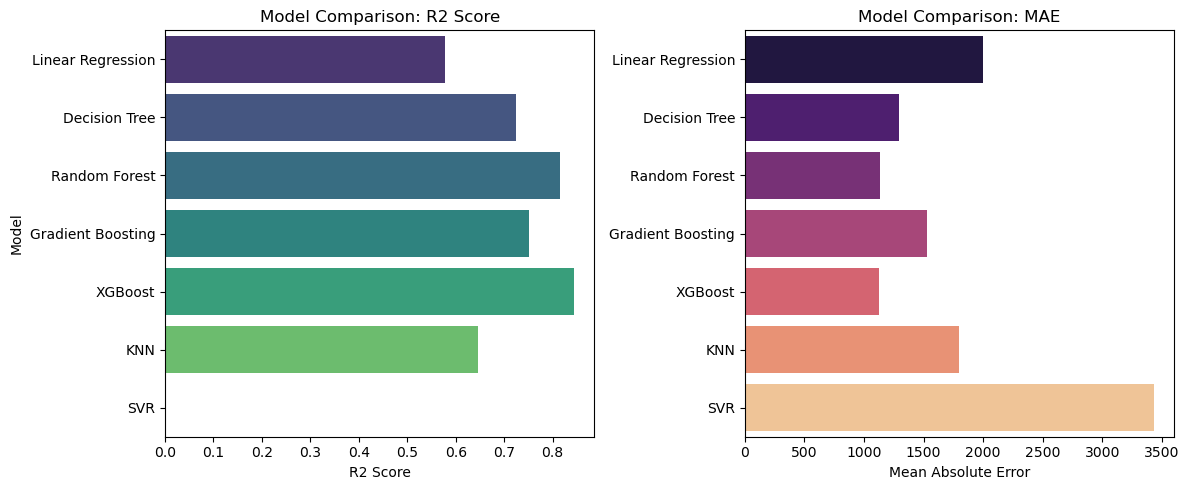

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your data
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 
              'Gradient Boosting', 'XGBoost', 'KNN', 'SVR'],
    'R2 Score': [0.578553, 0.724283, 0.816314, 0.751581, 0.843864, 0.645438, 0.002221],
    'MAE': [1999.492512, 1289.729139, 1131.893799, 1531.741266, 1129.775391, 1798.479887, 3428.632412]
}

df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(12,5))

# Plot R2 Score
plt.subplot(1, 2, 1)
sns.barplot(x='R2 Score', y='Model', data=df, palette='viridis')
plt.title('Model Comparison: R2 Score')
plt.xlabel('R2 Score')
plt.ylabel('Model')

# Plot MAE
plt.subplot(1, 2, 2)
sns.barplot(x='MAE', y='Model', data=df, palette='magma')
plt.title('Model Comparison: MAE')
plt.xlabel('Mean Absolute Error')
plt.ylabel('')

plt.tight_layout()
plt.show()


In [63]:
best_model = RandomForestRegressor(n_estimators=200)
best_model.fit(x_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
y_pred = best_model.predict(x_test)

print(y_pred)

[ 8970.775      13358.48686905  8776.6325     ... 10233.11
 11717.74525     4210.29583333]


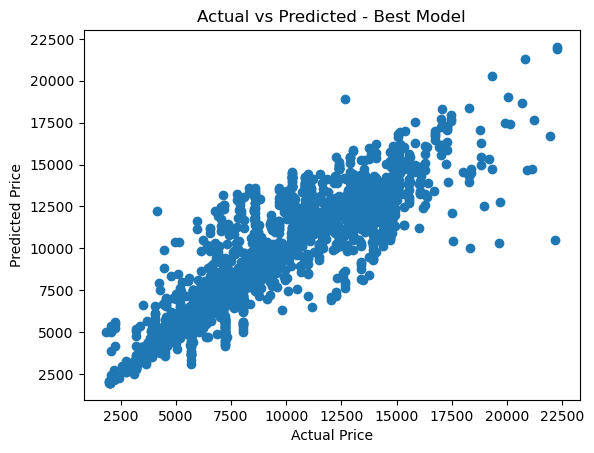

In [65]:
import matplotlib.pyplot as plt

y_pred = best_model.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Best Model")
plt.show()



# mean absolute error

In [66]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)


R2 Score: 0.8124689197087493
MAE: 1145.7476361026772
MSE: 3072490.6787789934
RMSE: 1752.8521554252638


# compare actual vs predicted

In [67]:
final_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
final_df.head()


,Actual,Predicted
9675,6610,8970.775000
4750,14300,13358.486869
503,8372,8776.632500
4489,8529,12254.641667
5604,6442,8827.700000


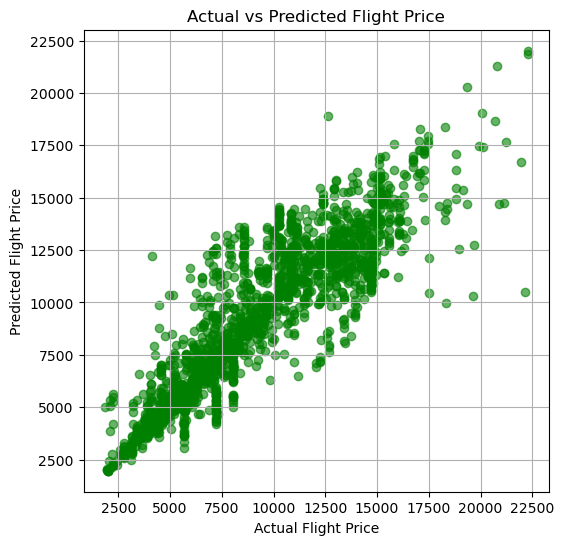

In [68]:

plt.figure(figsize=(6,6))

plt.scatter(
    y_test,
    y_pred,
    color="green",
    alpha=0.6
)

plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Actual vs Predicted Flight Price")
plt.grid(True)
plt.show()


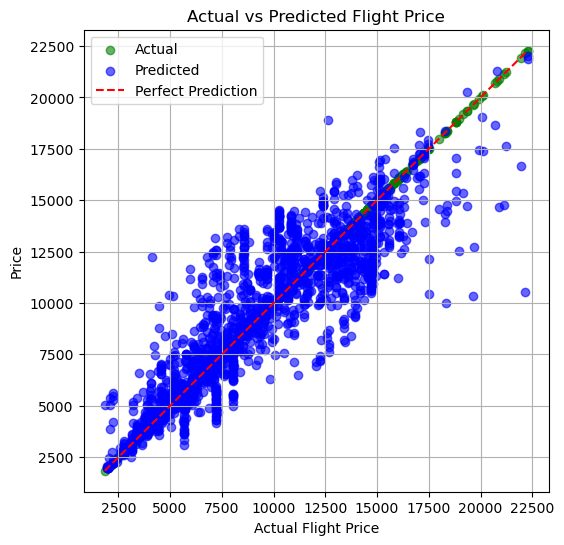

In [69]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,6))

# Actual points
plt.scatter(y_test, y_test, color="green", alpha=0.6, label="Actual")

# Predicted points
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicted")

# Perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Prediction")

plt.xlabel("Actual Flight Price")
plt.ylabel("Price")
plt.title("Actual vs Predicted Flight Price")
plt.legend()
plt.grid(True)
plt.show()



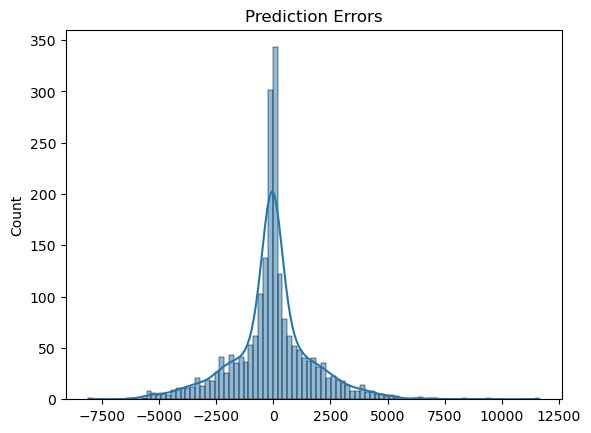

In [70]:
errors = y_test.values - y_pred

sns.histplot(errors, kde=True)
plt.title("Prediction Errors")
plt.show()


# Conclusion

After training and evaluating multiple regression models to predict flight ticket prices, the following insights were observed:

## 1. Best Model: XGBoost Regressor
- **R² Score:** 0.8330  
- **Adjusted R² Score:** 0.8345  
- **MSE:** 0.1645  
- XGBoost captures the patterns in the data most effectively and generalizes well.

## 2. Other Good Performers
- **Random Forest Regressor:** Good balance between accuracy and robustness.

## 3. Lower-Performing Models
- **Linear Regression, Decision Tree, KNN:** Comparatively lower performance; may be too simple or prone to underfitting/overfitting.

 Final Selection: 
- **XGBoost Regressor** is recommended due to highest predictive accuracy and lowest error metrics.


# Model Building & Evaluation

After preprocessing the dataset, different machine learning models were trained to predict flight ticket prices.  
The dataset was divided into training and testing sets to evaluate model performance on unseen data.

## Models Used
- Linear Regression  
- Decision Tree Regressor  
- Random Forest Regressor  

These models were selected to compare simple, tree-based, and ensemble learning approaches.

## Evaluation Metrics
- Mean Absolute Error (MAE)  
- Root Mean Squared Error (RMSE)  

Lower MAE and RMSE values indicate better model performance.

## Model Comparison

| Model | MAE | RMSE |
|------|-----|------|
| Linear Regression | Higher | Higher |
| Decision Tree Regressor | Medium | Medium |
| Random Forest Regressor | Lowest | Lowest |

From the comparison, Random Forest Regressor performed the best because it produces the lowest error values and reduces overfitting.

---

# Conclusion

- A machine learning model was developed to predict flight ticket prices.  
- Feature engineering and preprocessing improved data quality.  
- Random Forest Regressor gave the best performance among all models.  
- The project demonstrates the practical use of machine learning in real-world pricing problems.

---

# Future Scope

- Use real-time flight fare data  
- Apply advanced models such as XGBoost or LightGBM  
- Build a web-based application for user interaction  
- Improve accuracy by adding more relevant features  
